In [1]:
# importing libraries for data manipulation and analysis

import pandas as pd
import numpy as np

In [2]:
#%cd sample_data/
train = pd.read_csv(r"Tonmoy_Clustering.csv")

In [3]:
print(train.columns.values)

['rev_Mean' 'mou_Mean' 'totmrc_Mean' 'da_Mean' 'ovrmou_Mean' 'ovrrev_Mean'
 'vceovr_Mean' 'datovr_Mean' 'roam_Mean' 'rev_Range' 'mou_Range'
 'totmrc_Range' 'da_Range' 'ovrmou_Range' 'ovrrev_Range' 'vceovr_Range'
 'datovr_Range' 'roam_Range' 'change_mou' 'change_rev' 'drop_vce_Mean'
 'drop_dat_Mean' 'blck_vce_Mean' 'blck_dat_Mean' 'unan_vce_Mean'
 'unan_dat_Mean' 'plcd_vce_Mean' 'plcd_dat_Mean' 'recv_vce_Mean'
 'recv_sms_Mean' 'comp_vce_Mean' 'comp_dat_Mean' 'custcare_Mean'
 'ccrndmou_Mean' 'cc_mou_Mean' 'inonemin_Mean' 'threeway_Mean'
 'mou_cvce_Mean' 'mou_cdat_Mean' 'mou_rvce_Mean' 'owylis_vce_Mean'
 'mouowylisv_Mean' 'iwylis_vce_Mean' 'mouiwylisv_Mean' 'peak_vce_Mean'
 'peak_dat_Mean' 'mou_peav_Mean' 'mou_pead_Mean' 'opk_vce_Mean'
 'opk_dat_Mean' 'mou_opkv_Mean' 'mou_opkd_Mean' 'drop_blk_Mean'
 'attempt_Mean' 'complete_Mean' 'callfwdv_Mean' 'callwait_Mean'
 'drop_vce_Range' 'drop_dat_Range' 'blck_vce_Range' 'blck_dat_Range'
 'unan_vce_Range' 'unan_dat_Range' 'plcd_vce_Range' 'plcd_da

In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21136 entries, 0 to 21135
Columns: 128 entries, rev_Mean to store_lat
dtypes: float64(76), int64(51), object(1)
memory usage: 20.6+ MB
None


In [5]:
print("*****In the train set*****")
print(train.isna().sum())

*****In the train set*****
rev_Mean       0
mou_Mean       0
totmrc_Mean    0
da_Mean        0
ovrmou_Mean    0
              ..
Customer_ID    0
churn          0
servicetime    0
store_long     0
store_lat      0
Length: 128, dtype: int64


In [6]:
train = train.drop(['Customer_ID'], axis=1)

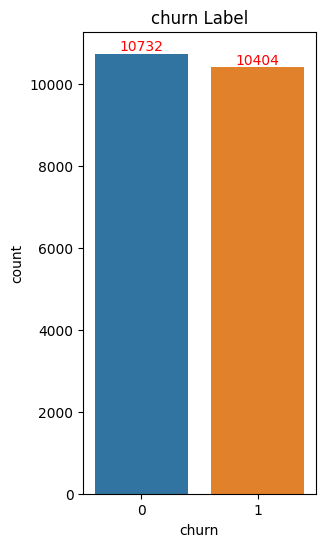

0    10732
1    10404
Name: churn, dtype: int64
0    0.507759
1    0.492241
Name: churn, dtype: float64


In [7]:
# 2(2)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3,6))

# Visualize the each class label category,'churn' in train
sns.countplot(x='churn', data=train)
plt.title('churn Label')

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
          color='red', ha='center', va='bottom')
plt.show()

#print the counts of each category
print(train['churn'].value_counts())
# print the proportions of each category
print(train['churn'].value_counts(normalize=True))

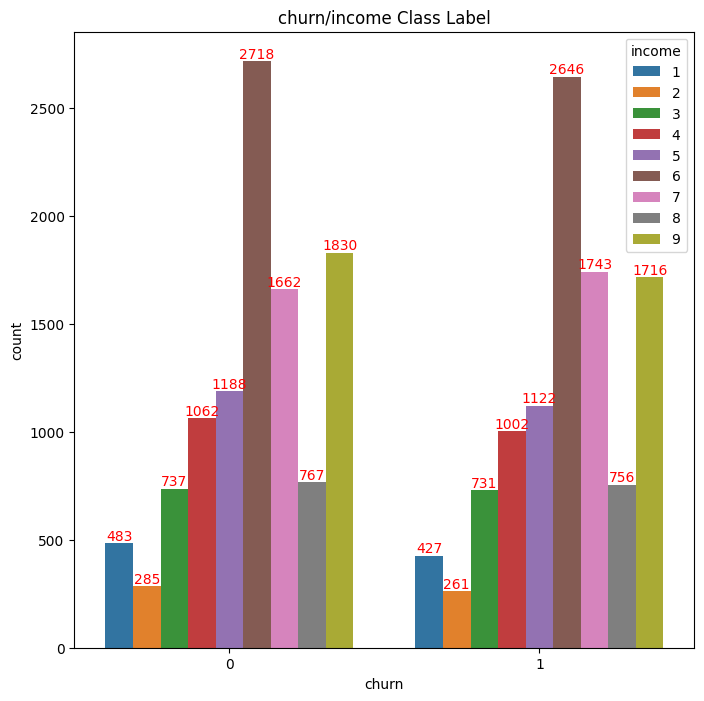

income     churn
6       7  0.511894
2       3  0.497956
7       8  0.496389
5       6  0.493289
4       5  0.485714
3       4  0.485465
8       9  0.483926
1       2  0.478022
0       1  0.469231

In [8]:
# 2(3)relationship between ‘churn’ value and ‘income’

plt.figure(figsize=(8,8))
sns.countplot(x='churn', hue='income', data=train)
plt.title('churn/income Class Label')

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
          color='red', ha='center', va='bottom')
plt.show()

#	Compute the probability of being 0 or 1 of class label
train[['income', 'churn']].groupby(['income'], as_index=False).mean().sort_values(by='churn',ascending=False)


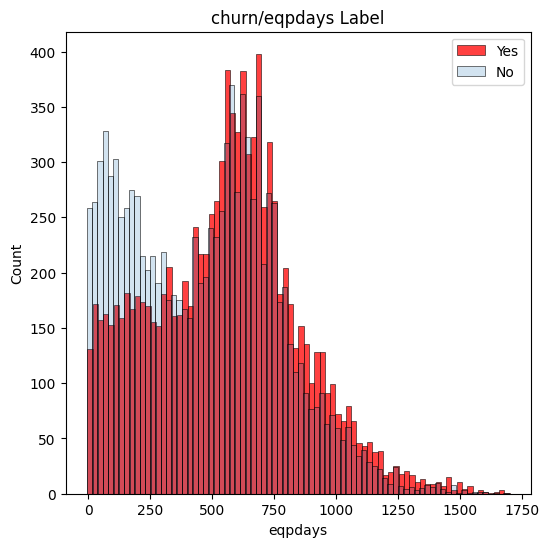

eqpdays  churn
1413     1698    1.0
1277     1303    1.0
1034     1029    1.0
1051     1046    1.0
1272     1298    1.0
...       ...    ...
1281     1310    0.0
1275     1301    0.0
1264     1285    0.0
1257     1274    0.0
0          -5    0.0

[1414 rows x 2 columns]

In [9]:
# 2(4)

plt.figure(figsize=(6,6))
plt.title('churn/eqpdays Label')
sns.histplot(train[train['churn']==1]['eqpdays'], label='Yes', color='r', bins = 80)
sns.histplot(train[train['churn']==0]['eqpdays'], label='No', alpha = 0.2, bins = 80)
plt.legend()
plt.show()

#	Compute the probability of being 0 or 1 of class label
train[['eqpdays', 'churn']].groupby(['eqpdays'], as_index=False).mean().sort_values(by='churn',ascending=False)

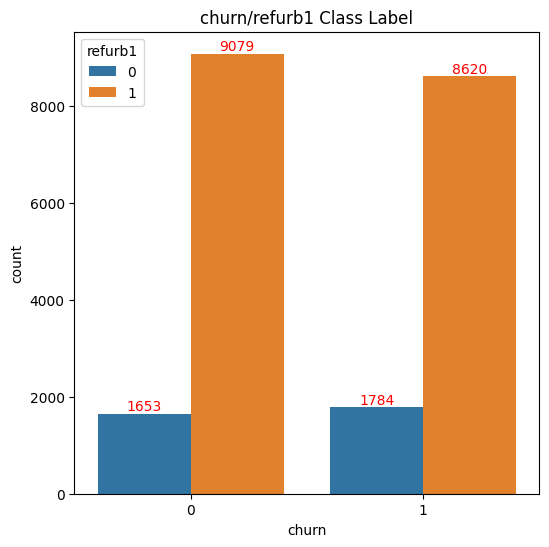

refurb1     churn
0        0  0.519057
1        1  0.487033

In [10]:
# 2(5)

plt.figure(figsize=(6,6))
sns.countplot(x='churn', hue='refurb1', data=train)
plt.title('churn/refurb1 Class Label')

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
          color='red', ha='center', va='bottom')
plt.show()

#	Compute the probability of being 0 or 1 of class label
train[['refurb1', 'churn']].groupby(['refurb1'], as_index=False).mean().sort_values(by='churn',ascending=False)

<ipython-input-11-cddc96150630>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['churn']==1]['totmou'], label='Yes')
<ipython-input-11-cddc96150630>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['churn']==0]['totmou'], label='No')


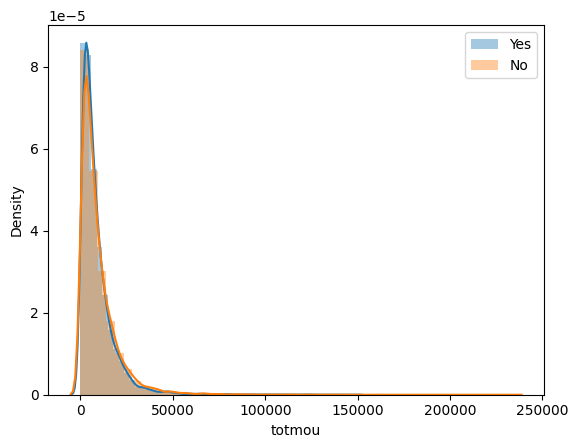

churn       totmou
1      1  8800.271786
0      0  9631.561820

In [11]:
# 2(6)

sns.distplot(train[train['churn']==1]['totmou'], label='Yes')
sns.distplot(train[train['churn']==0]['totmou'], label='No')
plt.legend()
plt.show()

#compute mean value of total purchase with respect to response: May use sum(), count() or mean()

train[["totmou", "churn"]].groupby(['churn'], as_index=False).mean().sort_values(by='churn', ascending=False)

<ipython-input-12-c77fe01ed24f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['churn']==1]['months'], label='Yes')
<ipython-input-12-c77fe01ed24f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['churn']==0]['months'], label='No')


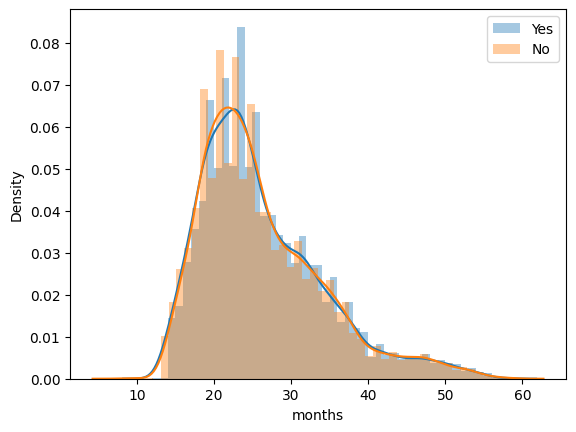

churn     months
1      1  26.140138
0      0  26.178252

In [12]:
# 2(7)
sns.distplot(train[train['churn']==1]['months'], label='Yes')
sns.distplot(train[train['churn']==0]['months'], label='No')
plt.legend()
plt.show()


#compute mean value of total purchase with respect to response: May use sum(), count() or mean()

train[["months", "churn"]].groupby(['churn'], as_index=False).mean().sort_values(by='churn', ascending=False)

In [14]:
used = ['blck_dat_Mean', 'blck_vce_Mean', 'drop_vce_Mean', 'rev_Mean', 'churn']
train = train[used]

In [15]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21136 entries, 0 to 21135
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   blck_dat_Mean  21136 non-null  float64
 1   blck_vce_Mean  21136 non-null  float64
 2   drop_vce_Mean  21136 non-null  float64
 3   rev_Mean       21136 non-null  float64
 4   churn          21136 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 825.8 KB
None


In [16]:
print("*****In the train set*****")
print(train.isna().sum())

*****In the train set*****
blck_dat_Mean    0
blck_vce_Mean    0
drop_vce_Mean    0
rev_Mean         0
churn            0
dtype: int64


In [17]:
# 3.1(1)

X = np.array(train.drop(['churn'], axis = 1))
y = np.array(train['churn'].astype(int))

In [18]:
# 3.1(2)

from sklearn.cluster import KMeans

# initialize a KMeans object, kmeans, with the number of clusters=4 in KMeans()
kmeans = KMeans(n_clusters=4,random_state=10)

# fit a KMeans object, kmeans, to X
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=10)

In [19]:
# Print the centroids of clusters with cluster_centers_ of kmeans object
print (kmeans.cluster_centers_)

[[4.97480842e-03 2.30678691e+00 3.34423557e+00 3.84421491e+01]
 [3.37078652e-02 1.25848047e+01 1.82043874e+01 2.24535935e+02]
 [0.00000000e+00 3.33333333e-01 2.50000000e+01 3.84326250e+03]
 [3.10532942e-02 5.90397258e+00 9.22303819e+00 9.31656789e+01]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

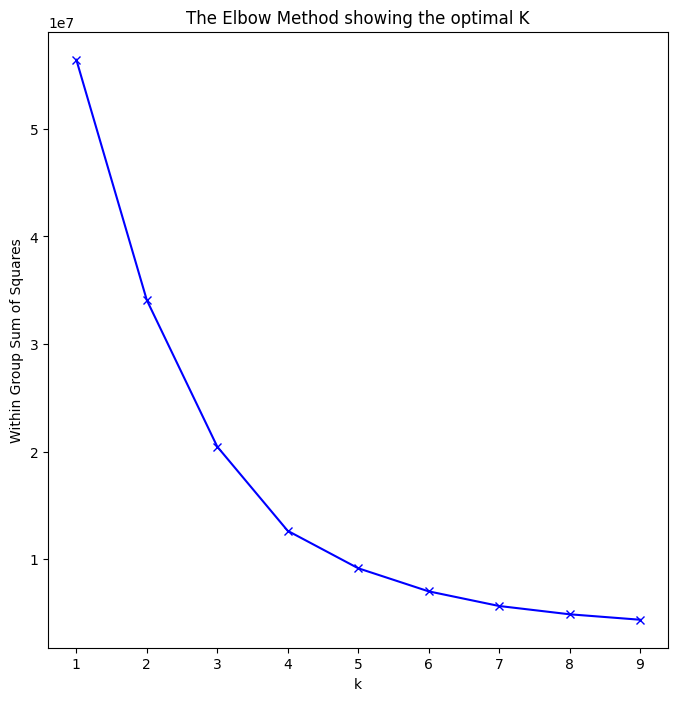

In [20]:
wgss = []

K = range(1,10)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wgss.append(kmeans.inertia_)
plt.figure(figsize=(8,8))

# plot with two arguments:
plt.plot(K, wgss, 'bx-')
plt.xlabel('k')
plt.ylabel('Within Group Sum of Squares')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [21]:
# 3.1(4)

kmeans = KMeans(n_clusters=4,random_state=10)

kmeans.fit(X)

y_std = kmeans.predict(X)
print (kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[4.97480842e-03 2.30678691e+00 3.34423557e+00 3.84421491e+01]
 [3.37078652e-02 1.25848047e+01 1.82043874e+01 2.24535935e+02]
 [0.00000000e+00 3.33333333e-01 2.50000000e+01 3.84326250e+03]
 [3.10532942e-02 5.90397258e+00 9.22303819e+00 9.31656789e+01]]


In [22]:
#number of data points
from collections import Counter

print(Counter(kmeans.labels_))

Counter({0: 15751, 3: 4762, 1: 622, 2: 1})


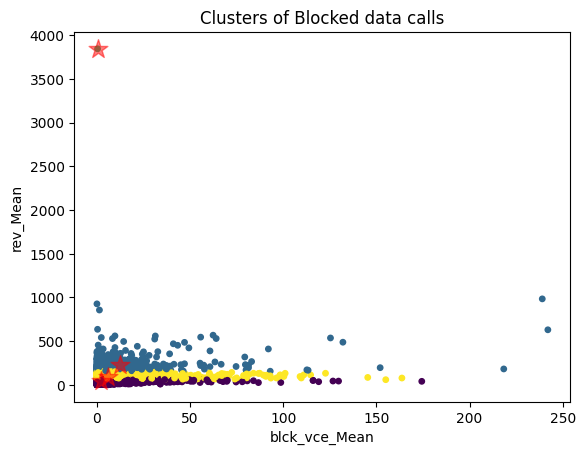

In [23]:
# 3.1(5)

plt.scatter(X[:, 1], X[:,3], c=y_std, s=15)

# get cluster centers to represent as *
centers = kmeans.cluster_centers_

# plot clustering centers
plt.scatter(centers[:, 1], centers[:, 3], c='red', s=200, alpha=0.5, marker="*");
plt.title('Clusters of Blocked data calls')
plt.xlabel('blck_vce_Mean')
plt.ylabel('rev_Mean')
plt.show()

In [24]:
# 3.2(1) remove outliers using zscore

from scipy import stats

# get z score from train dataframe
z = np.abs(stats.zscore(train))

# save all columns in the train data set within z < 3 from train dataframe into df_o
df_o = train[(z < 3).all(axis=1)]

In [25]:
# check the dimension of the new dataframe after removing outliers using shape
df_o.shape

(20229, 5)

In [26]:
# 3.2(2)

X = np.array(df_o.drop(['churn'], axis=1))
y = np.array(df_o['churn'].astype(int))

# initialize a KMeans object, kmeans, with n_clusters=2 in KMeans()
kmeans = KMeans(n_clusters=4,random_state=10)

# fit a KMeans object, kmeans, to X
kmeans.fit(X)

# Save the predicted cluster index into y_std
y_std = kmeans.predict(X)

# Print the centroids of clusters with cluster_centers_
print (kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.46527636e-03 1.43542561e+00 2.20374157e+00 2.97898314e+01]
 [3.26178451e-03 4.03251263e+00 7.61300505e+00 8.88972204e+01]
 [4.02551234e-03 2.94620452e+00 4.84880803e+00 5.43626489e+01]
 [1.14433370e-02 5.75378368e+00 1.03052787e+01 1.49980570e+02]]


In [27]:
#printing number of records in each cluster

from collections import Counter
print(Counter(kmeans.labels_))

Counter({0: 9786, 2: 6378, 1: 3164, 3: 901})


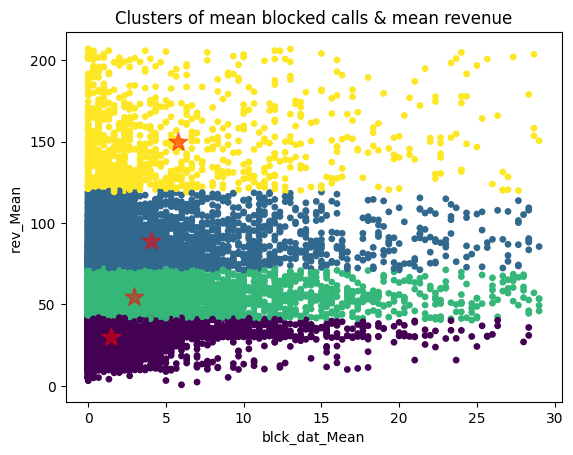

In [28]:
# 3.2(3)

plt.scatter(X[:, 1], X[:, 3], c=y_std, s=15)

# get cluster centers to represent as *
centers = kmeans.cluster_centers_

# plot clustering centers
plt.scatter(centers[:, 1], centers[:, 3], c='red', s=200, alpha=0.5, marker="*");
plt.title('Clusters of mean blocked calls & mean revenue')
plt.xlabel('blck_dat_Mean')
plt.ylabel('rev_Mean ')
plt.show()

In [29]:
# 3.3(1)

from sklearn.decomposition import PCA

# create a pca object with 2 principal components
pca = PCA(2)

# fit and transform pca object to X and save it to X_pca
X_pca = pca.fit_transform(X)

# print out the number of records and columns in X_pca
X_pca.shape

(20229, 2)

In [30]:
# 3.3(2)

kmeans = KMeans(n_clusters=4,random_state=10)

# fit a KMeans object, kmeans, to X
kmeans.fit(X_pca)

# Save the predicted cluster index into y_pca
y_pca = kmeans.predict(X_pca)

# print the centroids of clusters with cluster_centers_
print (kmeans.cluster_centers_)

# print the number of records in each cluster
from collections import Counter
print(Counter(kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 37.18717676   0.55437587]
 [-22.39418967  -0.35860453]
 [  2.49590553   0.50509564]
 [ 98.29015169  -1.57425283]]
Counter({1: 9828, 2: 6355, 0: 3150, 3: 896})


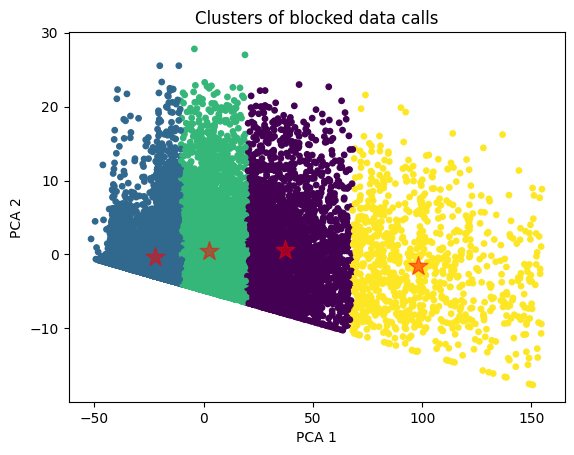

In [31]:
# 3.3(3)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pca, s=15) #, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker="*");
plt.title('Clusters of blocked data calls')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [32]:
# 3.4(1)

kmeans = KMeans(n_clusters=2,random_state=10)

# fit a KMeans object, kmeans, to X
kmeans.fit_transform(X)

# save the cluster index into labels
labels = kmeans.labels_

correct = 0
for i in range(len(X)):
    if labels[i] == y[i]:
        correct += 1

print(correct/len(X))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5084284937466014


In [33]:
#3.4(3)

from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Fit a KMeans object, kmeans, to X_std
kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit(X_std)

# save the cluster index into labels
labels = kmeans.predict(X_std)

correct = 0
for i in range(len(X)):
    if labels[i] == y[i]:
        correct += 1

accuracy = correct / len(X)
print(f"Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.49557565870779574


In [34]:
# 3.4(4)

from sklearn.preprocessing import MinMaxScaler

# fit and transform X with a MinMaxScaler() and save the transformed dataset into X_minmax
X_minmax = MinMaxScaler().fit_transform(X)

# fit a KMeans object, kmeans, to X_minmax
kmeans.fit(X_minmax)


# save the cluster index into labels
labels = kmeans.labels_

correct = 0
for i in range(len(X_minmax)):
    if labels[i] == y[i]:
        correct += 1

print(correct/len(X_minmax))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.49592169657422513


In [35]:
# 4(2)

from sklearn import cluster

# initialize a DBSCAN object
dbscan = cluster.DBSCAN(eps=0.2, min_samples=15)

# fit a DBSCAN object
dbscan.fit(X_std)

DBSCAN(eps=0.2, min_samples=15)

In [36]:
core_samples = dbscan.core_sample_indices_

# Save the clustering indices with dbscan.labels_ into labels
labels = dbscan.labels_
X_df = pd.DataFrame(X_std)
db_cluster = pd.DataFrame(labels)

X_df.head()

0         1         2         3
0 -0.062562 -0.361415  0.800723  0.170186
1 -0.062562 -0.600589 -0.766587 -1.121664
2 -0.062562 -0.441140  1.061941  0.098023
3 -0.062562 -0.600589 -0.831892 -1.116720
4 -0.062562 -0.201966  0.931332 -0.449864

In [37]:
df_s = pd.concat([X_df, db_cluster], axis=1)

# provide the name for each column in a new dataframe
df_s.columns = ['blck_dat_Mean', 'blck_vce_Mean', 'drop_vce_Mean', 'rev_Mean', 'db_cluster']

# measure the number of clusters in the set of labels with len(), ignoring cluster that contains outlier samples if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print ('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3


In [38]:
# value counts of data points in each cluster
df_s["db_cluster"].value_counts()

 0    15973
-1     4221
 1       19
 2       16
Name: db_cluster, dtype: int64

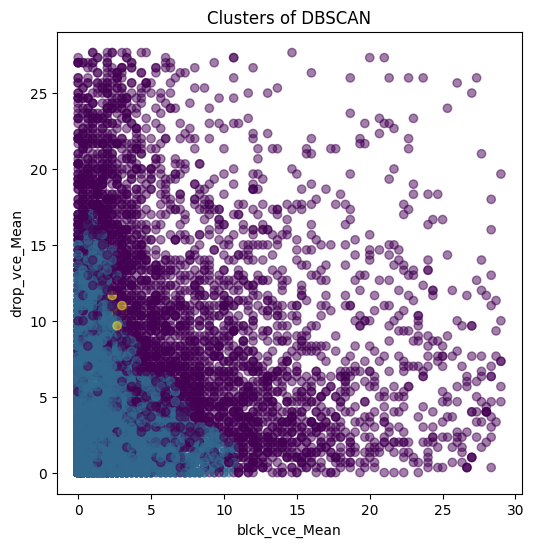

In [39]:
# 4(4)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 1], X[:, 2], c=labels, alpha=0.5)
plt.title('Clusters of DBSCAN')
plt.xlabel('blck_vce_Mean')
plt.ylabel('drop_vce_Mean')
plt.show()

Text(0.5, 1.0, 'Clusters of DBSCAN')

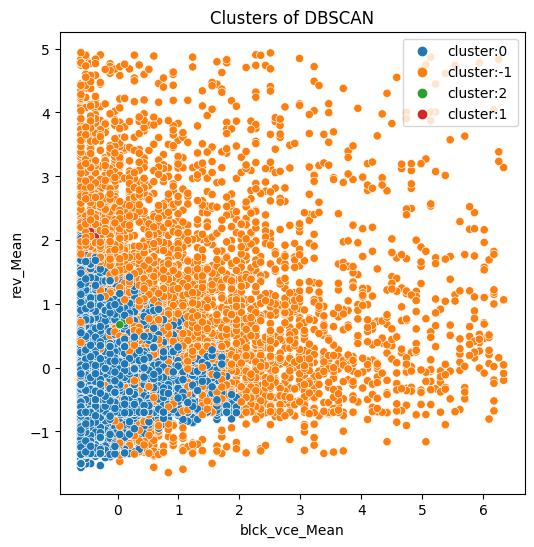

In [40]:
# 4(5)

fig = plt.figure(figsize=(6, 6))
sns.scatterplot(x="blck_vce_Mean", y="rev_Mean", hue=[f"cluster:{x}" for x in labels], data=df_s)
plt.title('Clusters of DBSCAN')

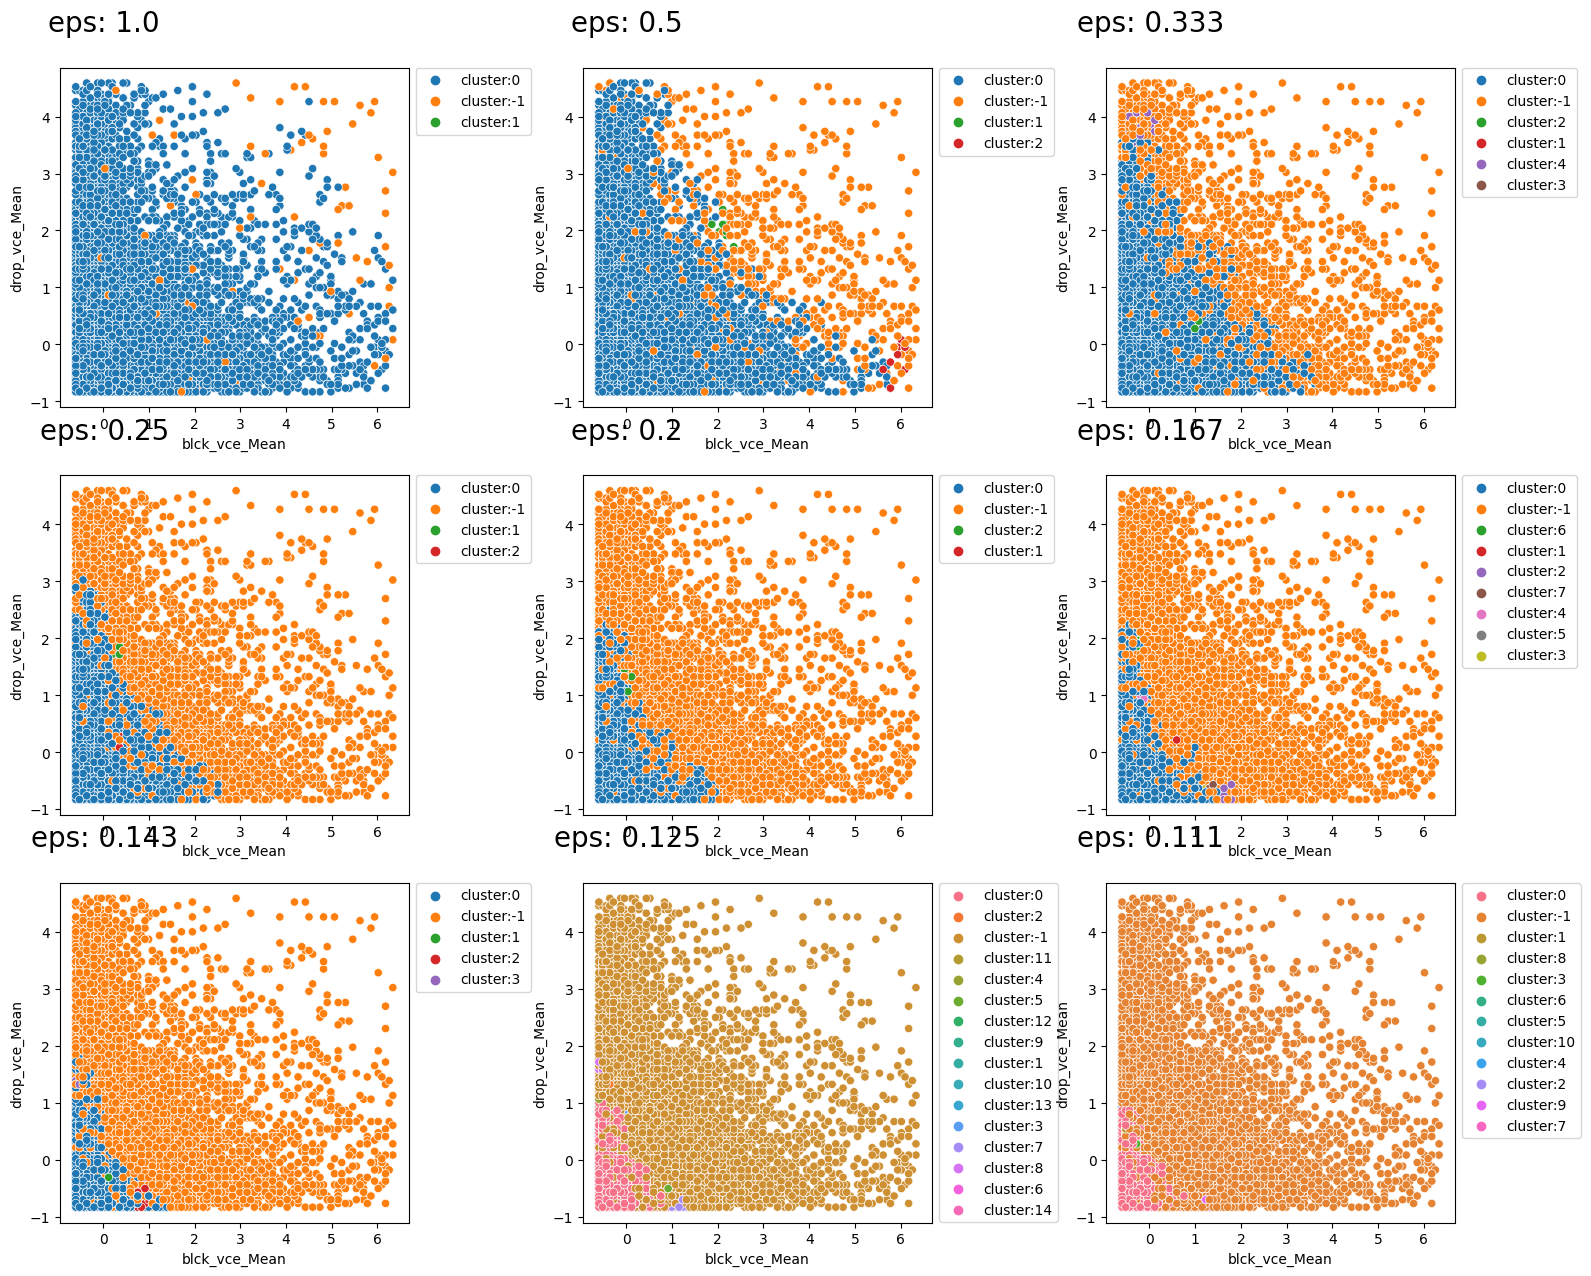

In [41]:
# 4(6)

fig = fig = plt.figure(figsize=(18, 15))
fig.subplots_adjust(hspace=.2, wspace=.5)
i = 1
for x in range(9, 0, -1):
    eps = 1/ (10-x)
    db = cluster.DBSCAN(eps=eps, min_samples=15).fit(X_std)
    labels = db.labels_

    ax = fig.add_subplot (3, 3, i)
    ax.text (0.02, 5.5, "eps: {}". format(round(eps, 3)), fontsize=20, ha="center")
    sns.scatterplot(x="blck_vce_Mean", y="drop_vce_Mean" , hue= ["cluster:{}".format(x) for x in labels], data=df_s)
    #place legend outside top right corner of plot
    plt.legend(bbox_to_anchor=(1.02, 1), loc= 'upper left', borderaxespad=0)
    i += 1

In [42]:
# 4(7)

dbscan = cluster.DBSCAN(eps=0.2, min_samples=15)
dbscan.fit(X_std)
labels = dbscan.labels_

correct = 0
for i in range(len(X_std)):
    if labels[i] == y[i]:
        correct += 1

print(correct/len(X_std))

0.3959167531761333


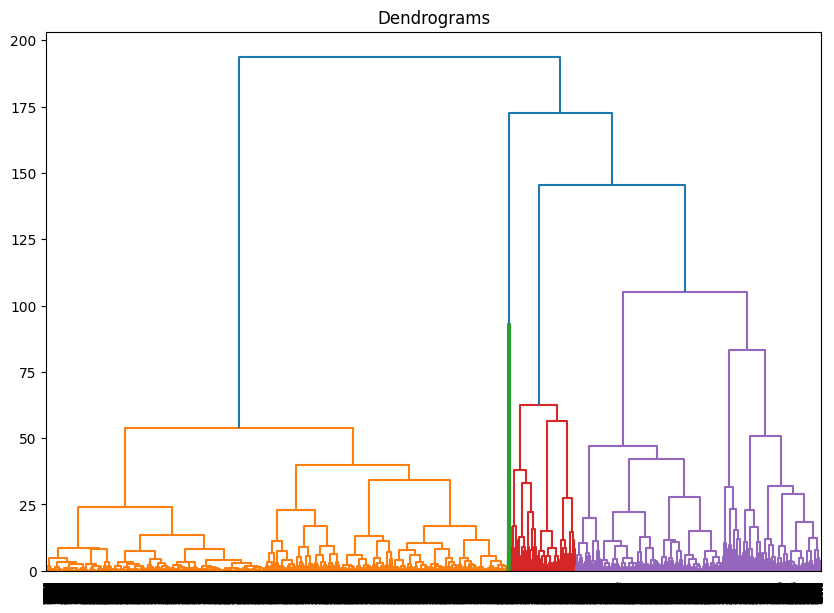

In [43]:
# 5(2)

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X_std, method='ward'))
plt.show()

In [44]:
# 5(3)

from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, affinity='euclidean')

model.fit(X_std)

labels = model.labels_

agg_cluster = pd.DataFrame(labels)

df_s['agg_cluster'] = agg_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [45]:
df_s['agg_cluster'].value_counts()

1    12057
0     8172
Name: agg_cluster, dtype: int64

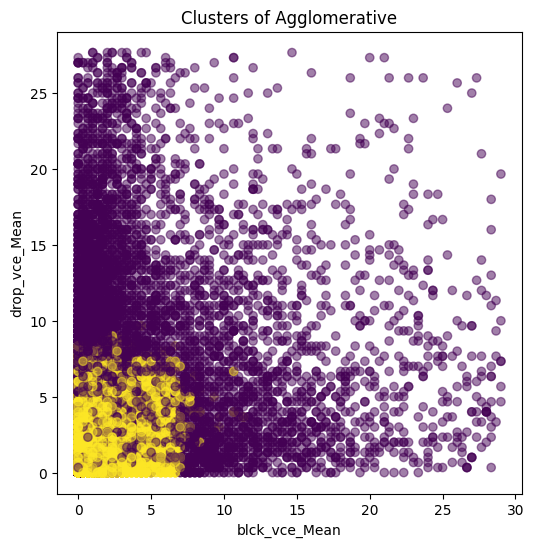

In [46]:
# 5(4)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 1], X[:, 2], c=labels, alpha=0.5)
plt.title('Clusters of Agglomerative')
plt.xlabel('blck_vce_Mean')
plt.ylabel('drop_vce_Mean')
plt.show()

Text(0.5, 1.0, 'Clusters of Agglomerative')

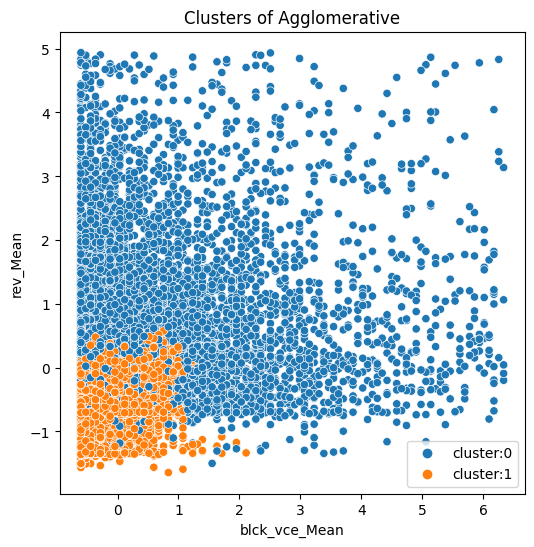

In [47]:
# 5(5)

fig = plt.figure(figsize=(6, 6))
sns.scatterplot(x="blck_vce_Mean", y="rev_Mean", hue=["cluster:{}".format(x) for x in labels], data=df_s)
plt.title('Clusters of Agglomerative')

In [48]:
# 5(8)

correct = 0
for i in range(len(X_std)):
    if labels[i] == y[i]:
        correct += 1

print("accuracy: ", correct/len(X_std))

accuracy:  0.5112956646398734


Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Components')

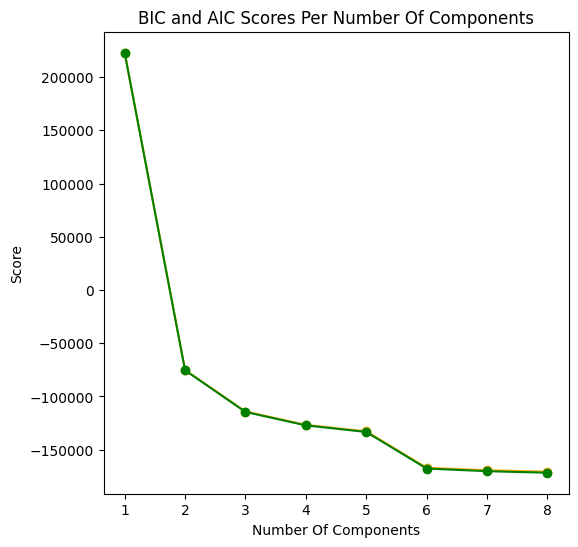

In [49]:
# 6(2)

# training gaussian mixture model
from sklearn.mixture import GaussianMixture

# Set up a range of cluster numbers to try
n_range = range(1,9)

# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    # The n_init parameter: control how many times the GaussianMixture algorithm is initialized
    gmm = GaussianMixture(n_components=n,random_state=123,n_init=10)
    # fit model to X_minmax
    gmm.fit(X_std)

    # Append the BIC and AIC to the respective lists
    bic_score.append(gmm.bic(X_std))
    aic_score.append(gmm.aic(X_std))

# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(6,6),nrows=1)

# Plot a range of cluster numbers on x-axis and BIC and AIC values on y-axis
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number Of Components', ylabel='Score')

# set xticks with a range of cluster numbers
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Components')

In [50]:
gmm = GaussianMixture(n_components=6)

# training gaussian mixture model
gmm.fit(X_std)

# predict class label with the trained gaussian mixture model
labels = gmm.predict(X_std)

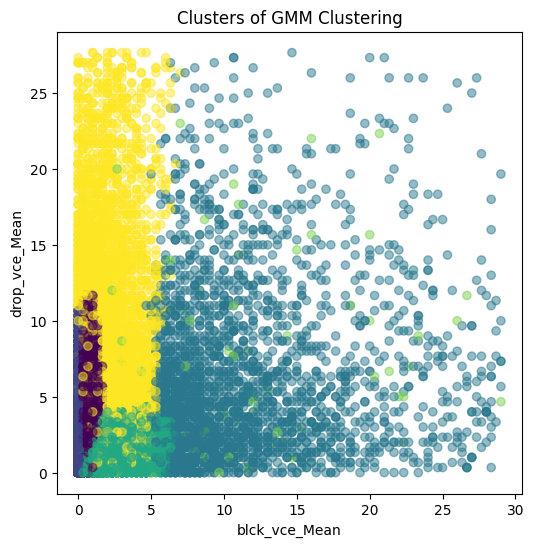

In [51]:
# 6(4)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 1], X[:, 2], c=labels, alpha=0.5)
plt.title('Clusters of GMM Clustering')
plt.xlabel('blck_vce_Mean')
plt.ylabel('drop_vce_Mean')
plt.show()

Text(0.5, 1.0, 'Clusters of GMM Clustering')

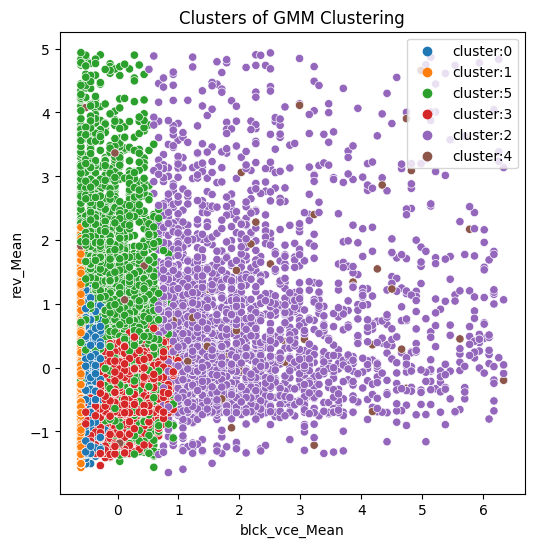

In [52]:
# 6(5)

fig = plt.figure(figsize=(6, 6))
sns.scatterplot(x="blck_vce_Mean", y="rev_Mean", hue=["cluster:{}".format(x) for x in labels], data=df_s)
plt.title('Clusters of GMM Clustering')

In [53]:
# 6(6)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(X_std)
labels = gmm.predict(X_std)

correct = 0
for i in range(len(X_std)):
    if labels[i] == y[i]:
        correct += 1

print("accuracy: ", correct/len(X_std))

accuracy:  0.5036333975975086
